In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import sklearn.preprocessing as preproc

In [2]:
#EDA

In [3]:
CFPB=pd.read_csv('shared/complaints_25Nov21.csv')
CFPB

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [4]:
CFPB.fillna('missing')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,missing,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",missing,missing,missing,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",missing,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",missing,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,missing,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",missing,missing,missing,JPMORGAN CHASE & CO.,VA,22406,Servicemember,missing,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",missing,missing,missing,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,missing,missing,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,missing,missing,JPMORGAN CHASE & CO.,FL,33133,missing,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",missing,missing,missing,JPMORGAN CHASE & CO.,NY,10312,missing,missing,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,missing,missing,missing,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,missing,missing,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",missing,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,missing,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [5]:
CFPB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207260 entries, 0 to 207259
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 207260 non-null  object
 1   Product                       207260 non-null  object
 2   Sub-product                   164245 non-null  object
 3   Issue                         207260 non-null  object
 4   Sub-issue                     10347 non-null   object
 5   Consumer complaint narrative  29391 non-null   object
 6   Company public response       58458 non-null   object
 7   Company                       207260 non-null  object
 8   State                         205066 non-null  object
 9   ZIP code                      197974 non-null  object
 10  Tags                          28265 non-null   object
 11  Consumer consent provided?    51313 non-null   object
 12  Submitted via                 207260 non-null  object
 13 

In [6]:
unique_value=CFPB['Consumer disputed?'].unique()
unique_value

array(['No', 'Yes'], dtype=object)

In [7]:
CFPB_null=CFPB.isnull().sum()
CFPB_null

Date received                        0
Product                              0
Sub-product                      43015
Issue                                0
Sub-issue                       196913
Consumer complaint narrative    177869
Company public response         148802
Company                              0
State                             2194
ZIP code                          9286
Tags                            178995
Consumer consent provided?      155947
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [8]:
number_of_yes = (CFPB['Consumer disputed?'] == 'Yes').sum()
number_of_yes

44903

In [9]:
#Xy variables

In [10]:
from sklearn import preprocessing
X = CFPB[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?']]
le = preprocessing.LabelEncoder()
y = le.fit_transform(CFPB['Consumer disputed?'])
X = pd.get_dummies(X)
X

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
0,False,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,False,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
207256,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
207257,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
207258,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
X

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
0,False,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,False,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
207256,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
207257,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
207258,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True


In [13]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
disputed_proportion = np.sum(X_test).iloc[0] / len(X_test) 

print(f": {disputed_proportion:.5f}")

: 0.21565


In [15]:
from imblearn.under_sampling import RandomUnderSampler

disputed_proportion = np.sum(y_train) / len(y_train)
print(f": {disputed_proportion:.5f}")

undersampler = RandomUnderSampler(random_state=123)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

: 0.21685


In [16]:
#XGBoost

              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32504
           1       0.27      0.63      0.38      8948

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.71      0.55      0.59     41452



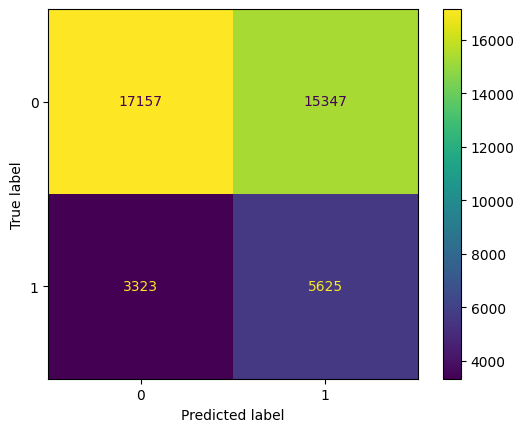

In [17]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_xgb = XGBClassifier(random_state=123)

model_xgb.fit(X_train, y_train)

pred = model_xgb.predict(X_test)

print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);


In [18]:
num_disputed_complaints = (y == 1).sum()
num_disputed_complaints

44903

In [19]:
num_nondisputed_complaints = (y == 0).sum()
num_nondisputed_complaints 

162357

In [20]:
#no model total cost
cost_disputed = 600
cost_nondisputed = 100
cost_due_diligence = 90

total_cost_disputed = num_disputed_complaints * cost_disputed
total_cost_nondisputed = num_nondisputed_complaints * cost_nondisputed


total_cost = total_cost_disputed + total_cost_nondisputed
total_cost

43177500

In [21]:
model_xgb.predict_proba(X_test)[:10]
np.round(model_xgb.predict_proba(X_test)[:10], 3)

array([[0.294, 0.706],
       [0.532, 0.468],
       [0.532, 0.468],
       [0.728, 0.272],
       [0.554, 0.446],
       [0.418, 0.582],
       [0.448, 0.552],
       [0.475, 0.525],
       [0.46 , 0.54 ],
       [0.466, 0.534]], dtype=float32)

In [22]:
model_xgb.predict(X_test)[:10]

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Confusion Matrix : 
 [[22158 10346]
 [ 4787  4161]]
Test accuracy =  0.6349271446492328
              precision    recall  f1-score   support

           0       0.82      0.68      0.75     32504
           1       0.29      0.47      0.35      8948

    accuracy                           0.63     41452
   macro avg       0.55      0.57      0.55     41452
weighted avg       0.71      0.63      0.66     41452



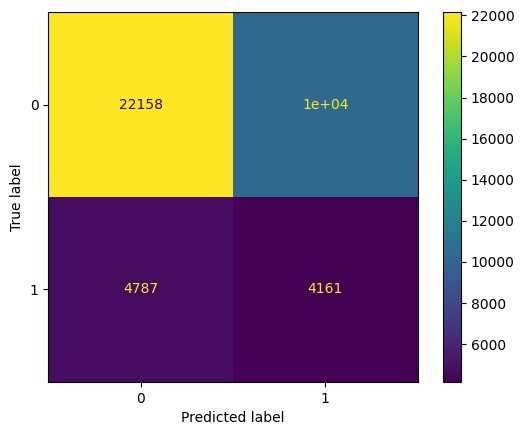

In [25]:
# Set threshold for identifying class 1
threshold = 0.54

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))
print(classification_report(y_true = y_test, y_pred = pred,))

In [24]:
true_no_dispute = 17157
false_dispute = 15347
false_no_dispute = 3323
true_dispute = 5625

baseline_cost = 100
extra_diligence_cost = 90
dispute_cost = 600

true_no_dispute_cost = true_no_dispute * baseline_cost
false_dispute_cost = false_dispute * (baseline_cost + extra_diligence_cost)
false_no_dispute_cost = false_no_dispute * dispute_cost
true_dispute_cost = true_dispute * (baseline_cost + extra_diligence_cost)

total_cost = (true_no_dispute_cost +
              false_dispute_cost +
              false_no_dispute_cost +
              true_dispute_cost)

print(total_cost)

7694180
